In [0]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
with open("/content/drive/My Drive/prepro/prepro_by_raj.txt") as f:
  discrib=f.read()

In [5]:
type(discrib)

str

In [0]:
import json
jsonaccept=discrib.replace("\'","\"")
data=json.loads(jsonaccept)

In [7]:
type(data)

dict

In [0]:
uni_words=set()
for tup in data.items():
  [ uni_words.update([word])  for sentence in tup[1] for  word in sentence.split(" ") ]


In [9]:
len(uni_words)

8442

In [10]:
totword=[]
for tup in data.items():
  [totword.append(word) for sen in tup[1] for word in sen.split(" ")]
print(len(totword))
print(totword[:20])

474084
['a', 'child', 'in', 'a', 'pink', 'dress', 'is', 'climbing', 'up', 'a', 'set', 'of', 'stairs', 'in', 'an', 'entry', 'way', '', 'a', 'girl']


In [0]:
wordfreq={}
for tup in data.items():
  for sen in tup[1]:
    for word in sen.split(" "):
      if wordfreq.get(str(word)) is None:
        wordfreq[str(word)]=0
      wordfreq[str(word)]+=1

In [12]:
c=1
for e in wordfreq.items():
  print(e)
  c+=1
  if c==10:
    break

('a', 62995)
('child', 1545)
('in', 18987)
('pink', 739)
('dress', 348)
('is', 9345)
('climbing', 507)
('up', 1302)
('set', 109)


In [13]:
len(wordfreq.items())

8442

In [0]:

threshold=10
thresword ={k:v for  k,v in  wordfreq.items() if v>threshold  }

In [15]:
len(thresword.items())

1851

In [0]:
f=open("/content/drive/My Drive/flickr8k/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr_8k.trainImages.txt")
trainid=f.read()
train=[x for x in trainid.split("\n")[:-1]]

f2=open("/content/drive/My Drive/flickr8k/Flickr_Data/Flickr_Data/Flickr_TextData/Flickr_8k.testImages.txt")
testid=f2.read()
test=[x for x in testid.split("\n")[:-1]]



In [17]:
testid[-1]

'\n'

In [18]:
trainid[-1]

'\n'

In [19]:
len(train)

6000

In [20]:
train[:10]

['2513260012_03d33305cf.jpg',
 '2903617548_d3e38d7f88.jpg',
 '3338291921_fe7ae0c8f8.jpg',
 '488416045_1c6d903fe0.jpg',
 '2644326817_8f45080b87.jpg',
 '218342358_1755a9cce1.jpg',
 '2501968935_02f2cd8079.jpg',
 '2699342860_5288e203ea.jpg',
 '2638369467_8fc251595b.jpg',
 '2926786902_815a99a154.jpg']

In [0]:
trainimgid=[x.split(".")[0] for x in train ]
testimgid=[x.split(".")[0] for x in test ]



In [22]:
trainimgid[:10]

['2513260012_03d33305cf',
 '2903617548_d3e38d7f88',
 '3338291921_fe7ae0c8f8',
 '488416045_1c6d903fe0',
 '2644326817_8f45080b87',
 '218342358_1755a9cce1',
 '2501968935_02f2cd8079',
 '2699342860_5288e203ea',
 '2638369467_8fc251595b',
 '2926786902_815a99a154']

In [0]:
traincap={}
for tup in data.items():
  if tup[0]  in trainimgid:
    traincap[tup[0]]=[]
    for cap in tup[1]:
      traincap[tup[0]].append("<sos> "+cap+" <eos>")

In [24]:
print(len(traincap))

6000


In [25]:
traincap["2699342860_5288e203ea"]

['<sos> a boy wearing a red t shirt is running through woodland  <eos>',
 '<sos> a child runs near some trees  <eos>',
 '<sos> a young boy is dancing around  <eos>',
 '<sos> a young boy with a red short sleeved shirt and jeans runs by some trees  <eos>',
 '<sos> the little boy in the red shirt stops to smile for the camera  <eos>']

In [26]:
!pip install tensorflow==1.14.

     |████████████████████████████████| 109.2MB 40kB/s 
     |████████████████████████████████| 491kB 55.0MB/s 
     |████████████████████████████████| 3.2MB 64.6MB/s 
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc2


In [27]:
from time import time
import pickle
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.models import Model, load_model
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Dense, Dropout, Embedding, LSTM
from keras.layers.merge import add

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [28]:
model = ResNet50(weights="imagenet",input_shape=(224,224,3))
model.summary()









102858752/102853048 [==============================] - 2s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
_________________

In [29]:
model.layers[-2]

In [0]:
newmodel=Model(model.input,model.layers[-2].output)

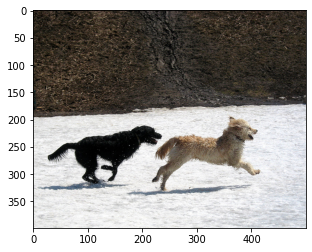

In [31]:
basepath="/content/drive/My Drive/flickr8k/Flickr_Data/Flickr_Data/Images"
path=basepath+"/"+"2513260012_03d33305cf.jpg"
img=plt.imread(path)
plt.imshow(img)

In [0]:
def preproimg(path):
  img=image.load_img(path,target_size=(224,224,3))
  img=image.img_to_array(img)
  img=img.reshape(1,224,224,3)
  #using inbuilt fn to preprocess image, by sub mean along each channel
  # as we have to use normalisn as in resnet50
  img=preprocess_input(img)# as we have to feed in batches
  return img


In [33]:
"""basepath="/content/drive/My Drive/flickr8k/Flickr_Data/Flickr_Data/Images"
path=basepath+"/"+"2513260012_03d33305cf.jpg"
plt.imshow(preproimg(path).reshape(224,224,3))"""

'basepath="/content/drive/My Drive/flickr8k/Flickr_Data/Flickr_Data/Images"\npath=basepath+"/"+"2513260012_03d33305cf.jpg"\nplt.imshow(preproimg(path).reshape(224,224,3))'

In [0]:
def convolve(path):
  img=preproimg(path)
  outimg=newmodel.predict(img)
  outimg=outimg.reshape(-1,)
  return outimg


In [35]:
import os
basepath2="/content/drive/My Drive/My Image"
images=os.listdir("/content/drive/My Drive/My Image")
images

['IMG_20191202_112818.jpg',
 'IMG_20191202_113025.jpg',
 '855224207_353338.jpg',
 '855226809_352570.jpg',
 '51567815_2329885900403516_8334106548640940032_n~2.jpg',
 'IMG-20191014-WA0000.jpg',
 'IMG-20200201-WA0005.jpg',
 'Screenshot_2020-01-08-16-22-17-34~2.png',
 'Screenshot_2020-04-07-22-17-21-27~2.png',
 'Screenshot_2020-03-12-19-53-59-05~2.png']

In [36]:
myimgvec=[]
for img in images:
  path=basepath2+"/"+img
  print(path)
  imgvec=convolve(path)
  myimgvec.append(imgvec)


/content/drive/My Drive/My Image/IMG_20191202_112818.jpg
/content/drive/My Drive/My Image/IMG_20191202_113025.jpg
/content/drive/My Drive/My Image/855224207_353338.jpg
/content/drive/My Drive/My Image/855226809_352570.jpg
/content/drive/My Drive/My Image/51567815_2329885900403516_8334106548640940032_n~2.jpg
/content/drive/My Drive/My Image/IMG-20191014-WA0000.jpg
/content/drive/My Drive/My Image/IMG-20200201-WA0005.jpg
/content/drive/My Drive/My Image/Screenshot_2020-01-08-16-22-17-34~2.png
/content/drive/My Drive/My Image/Screenshot_2020-04-07-22-17-21-27~2.png
/content/drive/My Drive/My Image/Screenshot_2020-03-12-19-53-59-05~2.png


In [37]:
myimgvec

[array([0.16684172, 0.08508223, 0.34424537, ..., 0.14085218, 0.19734706,
        2.4317346 ], dtype=float32),
 array([0.06029798, 1.029124  , 0.11850892, ..., 0.        , 0.        ,
        0.8348073 ], dtype=float32),
 array([0.06488826, 0.5594117 , 0.02118992, ..., 0.48173857, 0.        ,
        0.06725506], dtype=float32),
 array([0.04576637, 0.2286785 , 0.15062661, ..., 2.3429759 , 0.0745357 ,
        0.845648  ], dtype=float32),
 array([0.0917539 , 0.56960267, 0.04817627, ..., 1.0038534 , 0.35764703,
        0.24333008], dtype=float32),
 array([0.18895622, 0.2766715 , 0.        , ..., 1.4066293 , 0.0484879 ,
        0.60310674], dtype=float32),
 array([0.10373834, 2.221884  , 0.        , ..., 0.24210241, 0.07557748,
        0.00936539], dtype=float32),
 array([0.20728628, 0.5372633 , 0.2354304 , ..., 0.49791104, 0.36248538,
        0.0432706 ], dtype=float32),
 array([0.27716792, 0.01337988, 1.238317  , ..., 0.01267711, 0.8465011 ,
        0.04607246], dtype=float32),
 array([0.

In [38]:
path2=basepath2+"/"+'IMG_20191202_112818.jpg'
convolve(path2).shape

(2048,)

milestonee

In [0]:
start=time()
basepath="/content/drive/My Drive/flickr8k/Flickr_Data/Flickr_Data/Images"
idmapsfeature={}
for ind,imgid in enumerate(trainimgid):
  path=basepath+"/"+str(imgid)+".jpg"
  idmapsfeature[imgid]=convolve(path)

  if ind%100==0:
    print("Take a chill pill , it's running %d" %ind)
end=time()
print("Total time taken : %d"%(end-start))

Take a chill pill , it's running 0
Take a chill pill , it's running 100
Take a chill pill , it's running 200
Take a chill pill , it's running 300
Take a chill pill , it's running 400
Take a chill pill , it's running 500
Take a chill pill , it's running 600
Take a chill pill , it's running 700
Take a chill pill , it's running 800
Take a chill pill , it's running 900
Take a chill pill , it's running 1000
Take a chill pill , it's running 1100
Take a chill pill , it's running 1200
Take a chill pill , it's running 1300
Take a chill pill , it's running 1400
Take a chill pill , it's running 1500
Take a chill pill , it's running 1600
Take a chill pill , it's running 1700
Take a chill pill , it's running 1800
Take a chill pill , it's running 1900
Take a chill pill , it's running 2000
Take a chill pill , it's running 2100
Take a chill pill , it's running 2200
Take a chill pill , it's running 2300
Take a chill pill , it's running 2400
Take a chill pill , it's running 2500
Take a chill pill , it's

In [0]:

!mkdir saved

In [0]:

with open("saved/convolved_train_features.pkl","wb") as f:
    pickle.dump(idmapsfeature,f)

In [0]:
pickle_out=open("trainedconvolved.p","wb")
pickle.dump(idmapsfeature,pickle_out)
pickle_out.close()

In [0]:
start=time()
basepath="/content/drive/My Drive/flickr8k/Flickr_Data/Flickr_Data/Images"
testidmapsfeature={}
for ind,imgid in enumerate(testimgid):
  path=basepath+"/"+str(imgid)+".jpg"
  testidmapsfeature[imgid]=convolve(path)

  if ind%100==0:
    print("Take a chill pill , it's running %d" %ind)
end=time()
print("Total time taken : %d"%(end-start))

Take a chill pill , it's running 0
Take a chill pill , it's running 100
Take a chill pill , it's running 200
Take a chill pill , it's running 300
Take a chill pill , it's running 400
Take a chill pill , it's running 500
Take a chill pill , it's running 600
Take a chill pill , it's running 700
Take a chill pill , it's running 800
Take a chill pill , it's running 900
Total time taken : 918


In [0]:

with open("saved/convolved_test_features.pkl","wb") as f:
    pickle.dump(testidmapsfeature,f)

In [0]:
for e in idmapsfeature.items():
  print(e)
  break

('2513260012_03d33305cf', array([0.28047293, 0.4068742 , 0.0837997 , ..., 0.9107919 , 0.04341818,
       0.09577907], dtype=float32))


In [0]:
%cd /content/drive/My\ Drive/


/content/drive/My Drive


In [0]:
!pwd


/content/drive/My Drive


In [0]:

!mkdir convolve

In [0]:

with open("saved/convolved_test_features.pkl","wb") as f:
    pickle.dump(testidmapsfeature,f)

In [0]:

with open("saved/convolved_train_features.pkl","wb") as f:
    pickle.dump(idmapsfeature,f)

milestone

In [39]:
print(len(uni_words),len(thresword.items()))

8442 1851


In [40]:
thresword.keys()

dict_keys(['a', 'child', 'in', 'pink', 'dress', 'is', 'climbing', 'up', 'set', 'of', 'stairs', 'an', 'way', '', 'girl', 'going', 'into', 'wooden', 'building', 'little', 'the', 'to', 'her', 'black', 'dog', 'and', 'spotted', 'are', 'fighting', 'tri', 'colored', 'playing', 'with', 'each', 'other', 'on', 'road', 'white', 'brown', 'spots', 'staring', 'at', 'street', 'two', 'dogs', 'different', 'looking', 'pavement', 'moving', 'toward', 'covered', 'paint', 'sits', 'front', 'painted', 'rainbow', 'hands', 'bowl', 'sitting', 'large', 'small', 'grass', 'plays', 'it', 'there', 'pigtails', 'painting', 'young', 'outside', 'man', 'lays', 'bench', 'while', 'his', 'by', 'him', 'which', 'also', 'tied', 'sleeping', 'next', 'shirtless', 'lies', 'park', 'laying', 'holding', 'leash', 'ground', 'orange', 'hat', 'something', 'wears', 'glasses', 'wearing', 'beer', 'can', 'ears', 'rope', 'net', 'red', 'climbs', 'bridge', 'onto', 'ropes', 'playground', 'running', 'grassy', 'garden', 'surrounded', 'fence', 'thro

In [0]:
word2no={}
no2word={}
for ind,word in enumerate(thresword.keys()):# as ind=0 is reserved for padding in each sentence
  word2no[word]=ind+1
  no2word[ind+1]=word



In [42]:
no2word[10]

'of'

In [43]:
word2no['of']

10

In [44]:
len(word2no)

1851

In [0]:
word2no['<sos>']=1852
word2no['<eos>']=1853

no2word[1852]='<sos>'
no2word[1853]='<eos>'



In [0]:
vocabsize=len(no2word)+1

In [47]:
c=1
for cap in traincap.values():
  c+=1
  for sen in cap:
    print(len(sen.split(" ")))
  if c==5:
    break
  

20
10
11
12
15
11
18
21
15
11
22
15
23
16
12
15
17
20
14
13


In [0]:
maxlen=0
for cap in traincap.values():
  for sent in cap:
    maxlen=max(maxlen,len(sent.split()))
    

In [49]:
print(maxlen)

38


In [0]:

pickle_in=open("/content/drive/My Drive/saved/convolved_train_features.pkl","rb")
trainconvolve=pickle.load(pickle_in)

In [0]:

pickle_in=open("/content/drive/My Drive/saved/convolved_test_features.pkl","rb")
testconvolve=pickle.load(pickle_in)

In [52]:
for e in trainconvolve.items():
  print(e)
  print(trainconvolve['1000268201_693b08cb0e'].shape)
  break

('2513260012_03d33305cf', array([0.28047293, 0.4068742 , 0.0837997 , ..., 0.9107919 , 0.04341818,
       0.09577907], dtype=float32))
(2048,)


In [53]:
trainconvolve['1000268201_693b08cb0e']

array([0.04154286, 0.17076087, 0.2927856 , ..., 0.05089605, 0.31322372,
       0.8600747 ], dtype=float32)

In [54]:
for id,cap in traincap.items():
  print(id)
  print(type(id))
  print(trainconvolve[id])
  print(trainconvolve[id].shape)
  print(cap)
  n=trainconvolve[id]
  print(n)

  break

1000268201_693b08cb0e
<class 'str'>
[0.04154286 0.17076087 0.2927856  ... 0.05089605 0.31322372 0.8600747 ]
(2048,)
['<sos> a child in a pink dress is climbing up a set of stairs in an entry way  <eos>', '<sos> a girl going into a wooden building  <eos>', '<sos> a little girl climbing into a wooden playhouse  <eos>', '<sos> a little girl climbing the stairs to her playhouse  <eos>', '<sos> a little girl in a pink dress going into a wooden cabin  <eos>']
[0.04154286 0.17076087 0.2927856  ... 0.05089605 0.31322372 0.8600747 ]


In [55]:
print(len(traincap),len(trainconvolve))

6000 6000


In [0]:
def datagen(maxlen,traincap,word2no,trainconvolve,batchsize):
  n=0
  photo,x,y=[],[],[]
  while True:
    for id,caps in traincap.items():
      n+=1
      imgvec=np.zeros((2048,))
      imgvec=trainconvolve[str(id)]
      for sen in caps:
        all_word_insent=[word2no[x] for x in sen.split(" ") if x in word2no]
        for i in range(1,len(all_word_insent)):
          xi=all_word_insent[0:i]
          yi=all_word_insent[i]

          xi=pad_sequences([xi],maxlen=maxlen,padding='post',value=0)[0]
          yi=to_categorical([yi],num_classes=vocabsize)[0]




          x.append(xi)
          y.append(yi)
          photo.append(imgvec)
      if n==batchsize:
        yield [[np.array(x),np.array(photo)],np.array(y)]
        photo,x,y=[],[],[]
        n=0
          


        
        



In [57]:
f=open("/content/drive/My Drive/glove6b50dtxt/glove.6B.50d.txt",'r')
embds=f.readlines()
print(len(embds))

400000


In [58]:
print(len(embds[0].split()))
print(embds[0])


51
the 0.418 0.24968 -0.41242 0.1217 0.34527 -0.044457 -0.49688 -0.17862 -0.00066023 -0.6566 0.27843 -0.14767 -0.55677 0.14658 -0.0095095 0.011658 0.10204 -0.12792 -0.8443 -0.12181 -0.016801 -0.33279 -0.1552 -0.23131 -0.19181 -1.8823 -0.76746 0.099051 -0.42125 -0.19526 4.0071 -0.18594 -0.52287 -0.31681 0.00059213 0.0074449 0.17778 -0.15897 0.012041 -0.054223 -0.29871 -0.15749 -0.34758 -0.045637 -0.44251 0.18785 0.0027849 -0.18411 -0.11514 -0.78581



In [0]:
wordembeding={}
for line in embds:
  val=line.split()
  wordembeding[val[0]]=np.array(val[1:],dtype=float)

In [60]:
wordembeding["sex"] 

array([-0.010419,  0.18859 , -1.1103  , -0.1153  ,  0.41355 ,  1.6054  ,
        0.20117 , -0.88146 ,  0.41256 ,  0.95368 , -0.18311 , -0.30528 ,
        0.29189 , -0.10752 ,  1.4091  , -0.17546 , -0.75133 , -0.14834 ,
        0.3885  ,  0.079413,  0.22707 ,  1.2332  ,  0.29273 ,  1.3166  ,
       -0.49709 , -1.7793  ,  0.056008, -0.397   ,  0.51418 , -0.31688 ,
        2.3976  ,  0.31263 , -0.44624 , -1.1556  , -0.28933 , -0.080372,
       -0.043744, -0.89217 , -0.48708 , -0.60101 , -0.36962 ,  0.20775 ,
        0.519   ,  1.3062  ,  0.54721 , -0.77457 ,  0.10109 , -0.66229 ,
        0.16455 ,  0.51965 ])

In [0]:
embeddim=50
embedmatrix=np.zeros((len(word2no)+1,embeddim))   # len(word2no) + 1 is vocab size
for ind,word in no2word.items():
  wordembed=wordembeding.get(word)
  if wordembed is not None:
    embedmatrix[ind]=wordembed
  else:
   embedmatrix[ind]=np.zeros((50,))

In [62]:
embedmatrix[10]

array([ 0.70853  ,  0.57088  , -0.4716   ,  0.18048  ,  0.54449  ,
        0.72603  ,  0.18157  , -0.52393  ,  0.10381  , -0.17566  ,
        0.078852 , -0.36216  , -0.11829  , -0.83336  ,  0.11917  ,
       -0.16605  ,  0.061555 , -0.012719 , -0.56623  ,  0.013616 ,
        0.22851  , -0.14396  , -0.067549 , -0.38157  , -0.23698  ,
       -1.7037   , -0.86692  , -0.26704  , -0.2589   ,  0.1767   ,
        3.8676   , -0.1613   , -0.13273  , -0.68881  ,  0.18444  ,
        0.0052464, -0.33874  , -0.078956 ,  0.24185  ,  0.36576  ,
       -0.34727  ,  0.28483  ,  0.075693 , -0.062178 , -0.38988  ,
        0.22902  , -0.21617  , -0.22562  , -0.093918 , -0.80375  ])

In [63]:
embedmatrix[1853]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [64]:
embedmatrix.shape

(1854, 50)

In [65]:
# for image

imageinput=Input(shape=(2048,))
imglayer1=Dropout(0.3)(imageinput)
imglayer2=Dense(256,activation='relu')(imglayer1)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [66]:
#for captions
capinput=Input(shape=(maxlen,))
embed=Embedding(input_dim=vocabsize,output_dim=50,mask_zero=True)(capinput)
drops=Dropout(0.3)(embed)
lstmlayer=LSTM(256)(drops)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [67]:
finalinput=add([imglayer2,lstmlayer])
added=Dense(256,activation='relu')(finalinput)
vocabout=Dense(vocabsize,activation='softmax')(added)

#final model is
model=Model(inputs=[capinput,imageinput],outputs=vocabout)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 38)           0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 38, 50)       92700       input_3[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 2048)         0           input_2[0][0]                    
____________________________________________________________________________________________

In [68]:
model.layers[2]

In [0]:
model.layers[2].set_weights([embedmatrix])
model.layers[2].trainable=False

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam')

In [0]:
epochs = 20
batch_size = 3
steps = len(train)//batch_size


In [0]:
%cd /content/drive/My\ Drive/
!mkdir modelweights

/content/drive/My Drive


In [0]:
def trainingmodel(epochs):
  for i in range(epochs):
    gen=datagen(maxlen,traincap,word2no,trainconvolve,batch_size)
    model.fit_generator(gen,epochs=1,steps_per_epoch=steps,verbose=1)
    model.save('./modelweights/model_'+str(i)+'.h5')



In [0]:
trainingmodel(epochs)

Epoch 1/1
2000/2000 [==============================] - 334s 167ms/step - loss: 3.2977
Epoch 1/1
2000/2000 [==============================] - 337s 168ms/step - loss: 3.0494
Epoch 1/1
2000/2000 [==============================] - 333s 166ms/step - loss: 2.8968
Epoch 1/1
2000/2000 [==============================] - 332s 166ms/step - loss: 2.7884
Epoch 1/1
2000/2000 [==============================] - 334s 167ms/step - loss: 2.7053
Epoch 1/1
2000/2000 [==============================] - 333s 167ms/step - loss: 2.6389
Epoch 1/1
2000/2000 [==============================] - 331s 165ms/step - loss: 2.5841
Epoch 1/1
2000/2000 [==============================] - 337s 168ms/step - loss: 2.5392
Epoch 1/1
2000/2000 [==============================] - 337s 168ms/step - loss: 2.5001
Epoch 1/1
2000/2000 [==============================] - 331s 165ms/step - loss: 2.4646
Epoch 1/1
2000/2000 [==============================] - 334s 167ms/step - loss: 2.4366
Epoch 1/1
2000/2000 [==============================] -

In [69]:
model=load_model("/content/drive/My Drive/modelweights/model_19.h5")

In [0]:
def predictcaption(image):# assuming preprocessed image is passed 
  
  cap="<sos>"
  for i in range(maxlen):
    partialcap=[word2no[x] for x in cap.split()  if x in word2no]
    partialcap = pad_sequences([partialcap],maxlen,padding='post')
    predictedarray=model.predict([partialcap,image])


    predictedno=predictedarray.argmax()
    cap=cap+ " " + no2word[predictedno]
    if no2word[predictedno]=="<eos>":
      break
  finalcap=cap.split()[1:-1]
  finalcap=" ".join(finalcap)
  return finalcap



In [107]:
word2no['<eos>']

1853

In [0]:
def predictcaption2(image):# assuming preprocessed image is passed 
  
  cap="<sos>"
  for i in range(maxlen):
    partialcap=[word2no[x] for x in cap.split()  if x in word2no]
    partialcap = pad_sequences([partialcap],maxlen,padding='post')
    predictedarray=model.predict([partialcap,image])
    #print(predictedarray.shape)#(1,1854)
    #print(predictedarray)
    lis=[int(x) for x in word2no.values()]
    lis.insert(1854,1854)
    predictedno=np.random.choice(lis,p=predictedarray[0,:])

    #predictedno=predictedarray.argmax()
    cap=cap+ " " + no2word[predictedno]
    if no2word[predictedno]=="<eos>":
      break
  finalcap=cap.split()[1:-1]
  finalcap=" ".join(finalcap)
  return finalcap





man with a backpack walks down a


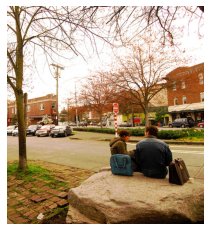

person is pulled a wakeboard in a


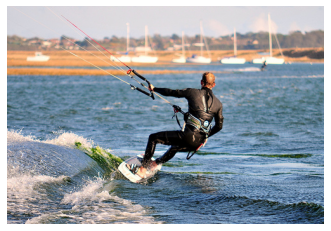

man in a hat is standing on a bench with a stick in his


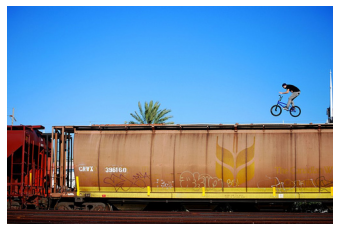

black and white dog is running through a grassy


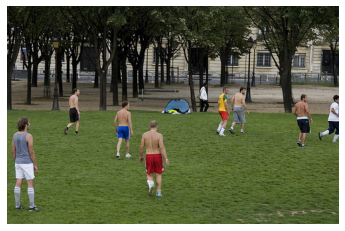

brown dog is being squirted from a


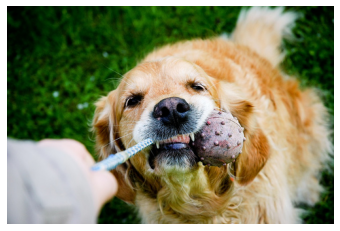

man in white and white polka dot shirt and


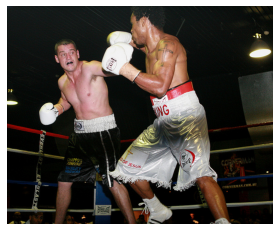

man in red jacket and hat sitting on a bench


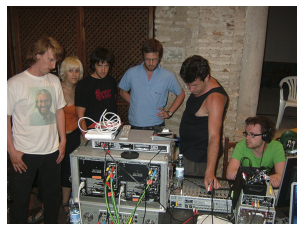

person in a yellow kayak paddling through a


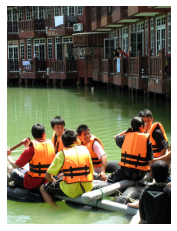

brown dog jumps over a red


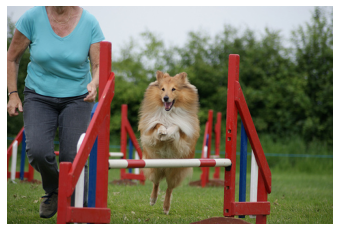

family in a bikini stand on a


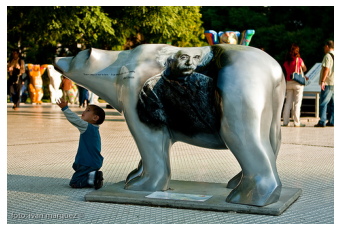

little boy sliding down a giant


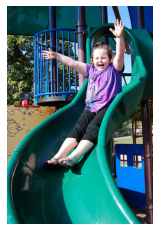

boy in red shirt and khaki pants and a boy in a blue shirt are playing on a green plastic


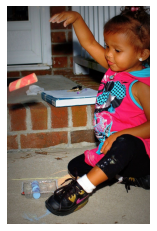

group of children playing with a


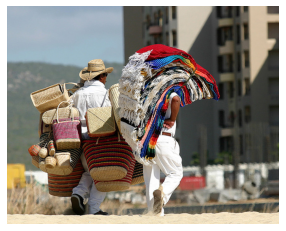

boy in red shorts jumping into pool into a


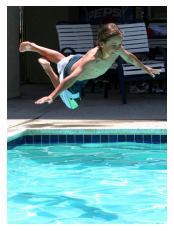

person in red shirt hiking bike on a dirt


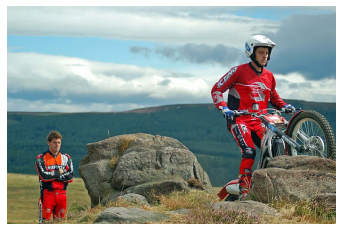

boy in red swim trunks swim through


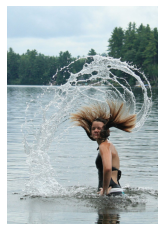

man in black shirt and khaki pants and a white beard and black beard on a


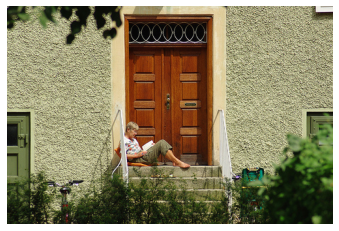

children are standing outside of a


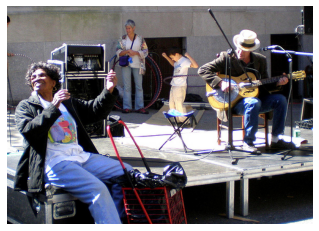

small boy in a bathing suit is smiling whilst sitting in a


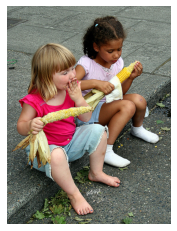

a man in a red shirt and black helmet is riding a bicycle on a


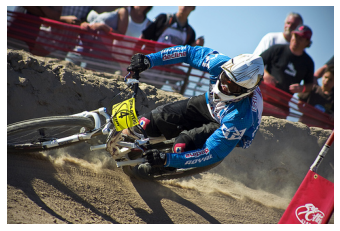

man with beads and beard hair and a beard bag walks down a


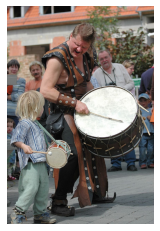

horse race down the


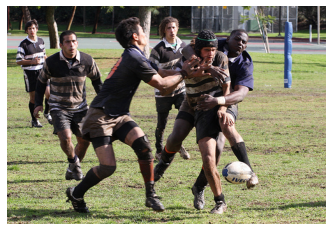

boy in red shirt and blue shorts running in the


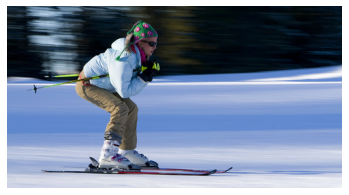

man in red shirt and hat stands in front of a store


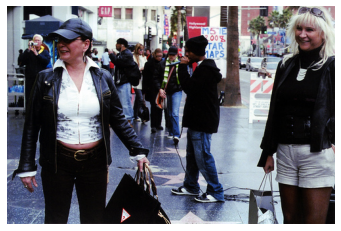

girl in a white shirt is walking in the


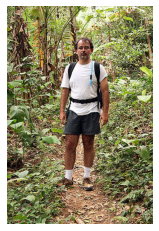

In [129]:
basepath="/content/drive/My Drive/flickr8k/Flickr_Data/Flickr_Data/Images"
for i in range(25):
  rndno=np.random.randint(1,1000)
  imgid=testimgid[rndno]
  path=basepath+"/"+imgid+".jpg"
  img=plt.imread(path)
  image=testconvolve[imgid].reshape((1,2048))
  caption=predictcaption(image)
  print(caption)
  plt.imshow(img)
  plt.axis('off')
  plt.show()


In [116]:
len(word2no)

1853

In [109]:
import os
basepath2="/content/drive/My Drive/My Image"
images=os.listdir("/content/drive/My Drive/My Image")
images

['IMG_20191202_112818.jpg',
 'IMG_20191202_113025.jpg',
 '855224207_353338.jpg',
 '855226809_352570.jpg',
 '51567815_2329885900403516_8334106548640940032_n~2.jpg',
 'IMG-20191014-WA0000.jpg',
 'IMG-20200201-WA0005.jpg',
 'Screenshot_2020-01-08-16-22-17-34~2.png',
 'Screenshot_2020-04-07-22-17-21-27~2.png',
 'Screenshot_2020-03-12-19-53-59-05~2.png']

In [0]:
no=len(images)

man with a beard and a hat is sitting on a bench next to a


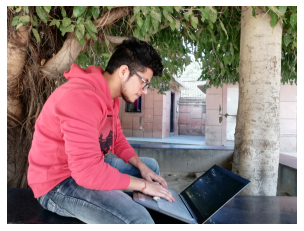

boy in red shirt and blue eyes walks through


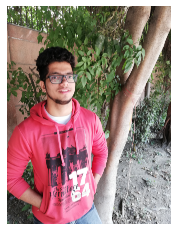

redheaded boy in red shirt and khaki jacket standing on a


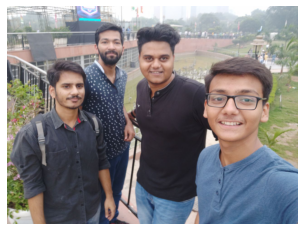

old man kissing a dog in a


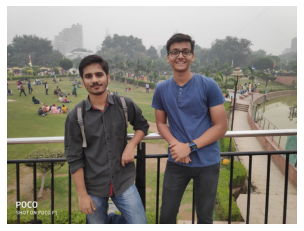

man with facial and a white bag is holding a


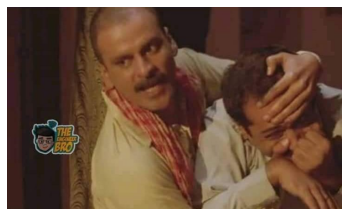

man in sunglasses and sunglasses sitting on a


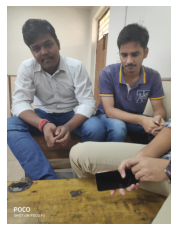

women in red robes and a parade


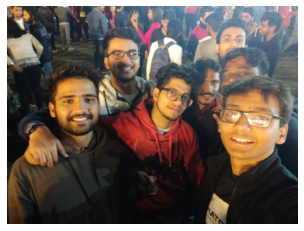

dog with a blue shirt and a black dog nose on his hind


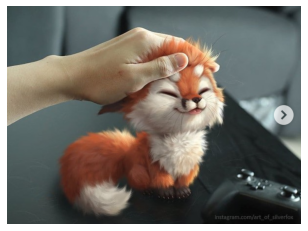

dog jumps into a


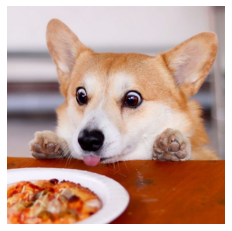

dog indoors on a


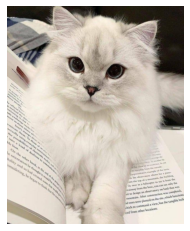

In [128]:
for ind,img in enumerate(images):
  path=basepath2+"/"+img
  #print(path)
  imgvec=myimgvec[ind]
  image=imgvec.reshape((1,2048))
  caption=predictcaption(image)
  print(caption)
  img=plt.imread(path)
  plt.imshow(img)
  plt.axis('off')
  plt.show()


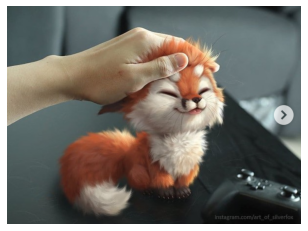

In [0]:
path3=basepath2+"/"+'Screenshot_2020-01-08-16-22-17-34~2.png'
img=plt.imread(path3)
plt.axis('off')
plt.imshow(img)


In [0]:
myimgvec[0].shape

(2048,)

In [0]:
for ind,val in enumerate(myimgvec):
  print(ind,val)

0 [0.16684172 0.08508223 0.34424537 ... 0.14085218 0.19734706 2.4317346 ]
1 [0.06029798 1.029124   0.11850892 ... 0.         0.         0.8348073 ]
2 [0.06488826 0.5594117  0.02118992 ... 0.48173857 0.         0.06725506]
3 [0.04576637 0.2286785  0.15062661 ... 2.3429759  0.0745357  0.845648  ]
4 [0.0917539  0.56960267 0.04817627 ... 1.0038534  0.35764703 0.24333008]
5 [0.18895622 0.2766715  0.         ... 1.4066293  0.0484879  0.60310674]
6 [0.10373834 2.221884   0.         ... 0.24210241 0.07557748 0.00936539]
7 [0.20728628 0.5372633  0.2354304  ... 0.49791104 0.36248538 0.0432706 ]
8 [0.8135304  0.6550491  0.         ... 0.27531704 0.10270995 0.6421597 ]
9 [0.27716792 0.01337988 1.238317   ... 0.01267711 0.8465011  0.04607246]


In [0]:
myimgvec

[array([0.16684172, 0.08508223, 0.34424537, ..., 0.14085218, 0.19734706,
        2.4317346 ], dtype=float32),
 array([0.06029798, 1.029124  , 0.11850892, ..., 0.        , 0.        ,
        0.8348073 ], dtype=float32),
 array([0.06488826, 0.5594117 , 0.02118992, ..., 0.48173857, 0.        ,
        0.06725506], dtype=float32),
 array([0.04576637, 0.2286785 , 0.15062661, ..., 2.3429759 , 0.0745357 ,
        0.845648  ], dtype=float32),
 array([0.0917539 , 0.56960267, 0.04817627, ..., 1.0038534 , 0.35764703,
        0.24333008], dtype=float32),
 array([0.18895622, 0.2766715 , 0.        , ..., 1.4066293 , 0.0484879 ,
        0.60310674], dtype=float32),
 array([0.10373834, 2.221884  , 0.        , ..., 0.24210241, 0.07557748,
        0.00936539], dtype=float32),
 array([0.20728628, 0.5372633 , 0.2354304 , ..., 0.49791104, 0.36248538,
        0.0432706 ], dtype=float32),
 array([0.8135304 , 0.6550491 , 0.        , ..., 0.27531704, 0.10270995,
        0.6421597 ], dtype=float32),
 array([0.